# Applying Data Transformations

## Loading Data

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


For the MinMaxScaler , the fit method computes the minimum and maximum value of each feature on the training set. In contrast to the
classifiers and regressors of Chapter 2 , the scaler is only provided with the data ( X_train ) when fit is called, and y_train is not used. You can see that all of the features are now between 0 and 1, as desired.  

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train) 

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n", ["{:.3f}".format(x) for x in X_train.min(axis = 0)])
print("per-feature maximum before scaling: \n",  ["{:.3f}".format(x) for x in X_train.max(axis = 0)])
print("per-feature minimum after scaling: \n {}".format(X_train_scaled.min(axis = 0)))
print("per-feature maximum after scaling: \n {}".format(X_train_scaled.max(axis = 0))) 

transformed shape: (426, 30)
per-feature minimum before scaling: 
 ['6.981', '9.710', '43.790', '143.500', '0.053', '0.019', '0.000', '0.000', '0.106', '0.050', '0.115', '0.360', '0.757', '6.802', '0.002', '0.002', '0.000', '0.000', '0.010', '0.001', '7.930', '12.020', '50.410', '185.200', '0.071', '0.027', '0.000', '0.000', '0.157', '0.055']
per-feature maximum before scaling: 
 ['28.110', '39.280', '188.500', '2501.000', '0.163', '0.287', '0.427', '0.201', '0.304', '0.096', '2.873', '4.885', '21.980', '542.200', '0.031', '0.135', '0.396', '0.053', '0.061', '0.030', '36.040', '49.540', '251.200', '4254.000', '0.223', '0.938', '1.170', '0.291', '0.577', '0.149']
per-feature minimum after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1. This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set. 

In [3]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling 
print("per-feature minimum after scaling: \n {}".format(X_test_scaled.min(axis = 0)))
print("per-feature maximum after scaling: \n {}".format(X_test_scaled.max(axis = 0))) 

per-feature minimum after scaling: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling: 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.

You can see that the data set in the second panel looks identical to the first; only the ticks on the axes have changed.
The test points moved incongruously to the training set, as they were scaled differently. 

In [4]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# make synthetic data
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state = 5, test_size = .1) 

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = mglearn.cm2(0), label = "Training set", s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set", s = 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2(0), label = "Training set" , s = 60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set" , s = 60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = mglearn.cm2(0), label = "training set" , s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^' , c = mglearn.cm2(1), label = "test set" , s = 60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes :
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout () 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

## The Effect of Preprocessing on Supervised Learning

In [5]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svm = SVC (C = 100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test , y_test))) 

Test set accuracy: 0.63


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Now, let’s scale the data using MinMaxScaler before fitting the SVC

In [6]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train ) 
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm . fit ( X_train_scaled , y_train )

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test))) 

Scaled test set accuracy: 0.97


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Standard Scaler

You can also easily replace one preprocessing algorithm with another by changing the class you use, as all of the preprocessing classes have thesame interface, consisting of the fit and transform methods

In [7]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform (X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test))) 

SVM test accuracy: 0.96


/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/YoheiMiyamoto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0.5, 1.0, 'scaled')

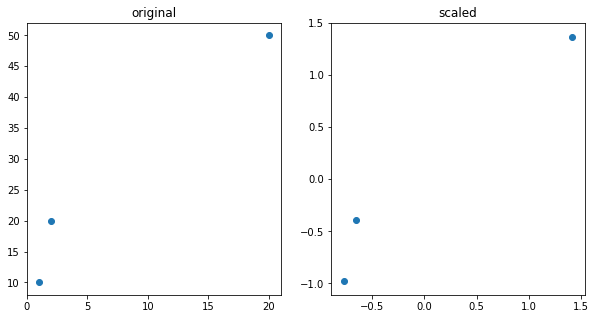

In [8]:
import numpy as np

X = np.array([[1,10],[2,20],[20,50]])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.ravel()

axes[0].scatter(X[:,0], X[:,1])
axes[0].set_title("original")

axes[1].scatter(X_scaled[:,0], X_scaled[:,1])
axes[1].set_title("scaled")

## Dimensionality Reduction, Feature Extraction, and Manifold Learning

### Principal Component Analysis (PCA)

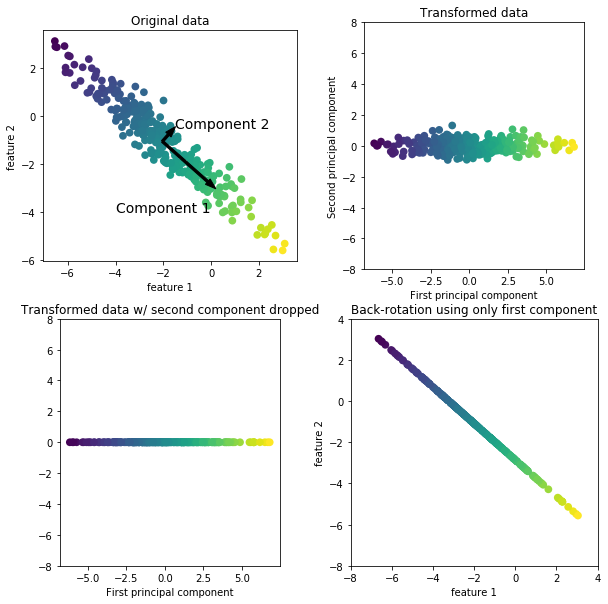

In [9]:
mglearn.plots.plot_pca_illustration()

we are trying to write each data point as a weighted sum of some components

In [10]:
from sklearn.decomposition import PCA

# original data
X = np.array([[1,2],[2,4],[3,6]])
print("X_blob.shape", X.shape)

# n_components = 2 の場合
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
print("X_pca.shape", X_pca.shape)
print("X_pca", X_pca)
print("pca.components_.shape", pca.components_.shape)
print("pca.components_", pca.components_)

# XとcomponentsからX_pcaを算出
# 以下の2つは同じ数値になる
print("X_pca[0]", X_pca[0])
# weighted sum of some components
print("X_pca[0,0]", X[0,0] * pca.components_[0,0] + X[0,1] * pca.components_[0,1])
print("X_pca[0,1]", X[0,0] * pca.components_[1,0] + X[0,1] * pca.components_[1,1])

# X_pcaをinverse
X_inversed = pca.inverse_transform(X_pca)
print("X_inversed", X_inversed)

print("")

# n_components = 1 の場合
pca = PCA(n_components=1, whiten=False).fit(X)
X_pca = pca.transform(X)
print("X_pca.shape", X_pca.shape)
print("X_pca", X_pca)
print("pca.components_.shape", pca.components_.shape)
print("pca.components_", pca.components_)

# XとcomponentsからX_pcaを算出
# 以下の2つは同じ数値になる
print("X_pca[0]", X_pca[0])
# weighted sum of some components
print("X_pca[0]", X[0,0] * pca.components_[0,0] + X[0,1] * pca.components_[0,1])

# X_pcaをinverse
X_inversed = pca.inverse_transform(X_pca)
print("X_inversed", X_inversed)

X_blob.shape (3, 2)
X_pca.shape (3, 2)
X_pca [[-2.23606798e+00  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.23606798e+00 -1.11022302e-16]]
pca.components_.shape (2, 2)
pca.components_ [[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]
X_pca[0] [-2.23606798e+00  1.11022302e-16]
X_pca[0,0] 2.23606797749979
X_pca[0,1] -1.1102230246251565e-16
X_inversed [[1. 2.]
 [2. 4.]
 [3. 6.]]

X_pca.shape (3, 1)
X_pca [[-2.23606798]
 [ 0.        ]
 [ 2.23606798]]
pca.components_.shape (1, 2)
pca.components_ [[0.4472136  0.89442719]]
X_pca[0] [-2.23606798]
X_pca[0] 2.23606797749979
X_inversed [[1. 2.]
 [2. 4.]
 [3. 6.]]


One of the most common applications of PCA is visualizinghigh-dimensional datasets. As we saw in Chapter 1 , it is hard to create scatter plots of data that has more than two features.

There is an even simpler visualization we can use, though computing histograms of each of the features for the two classes, benign and malignant cancer.

For example,the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points”seems quite informative, because the histograms are quite disjoint

malignant.shape (212, 30)
benign.shape (357, 30)


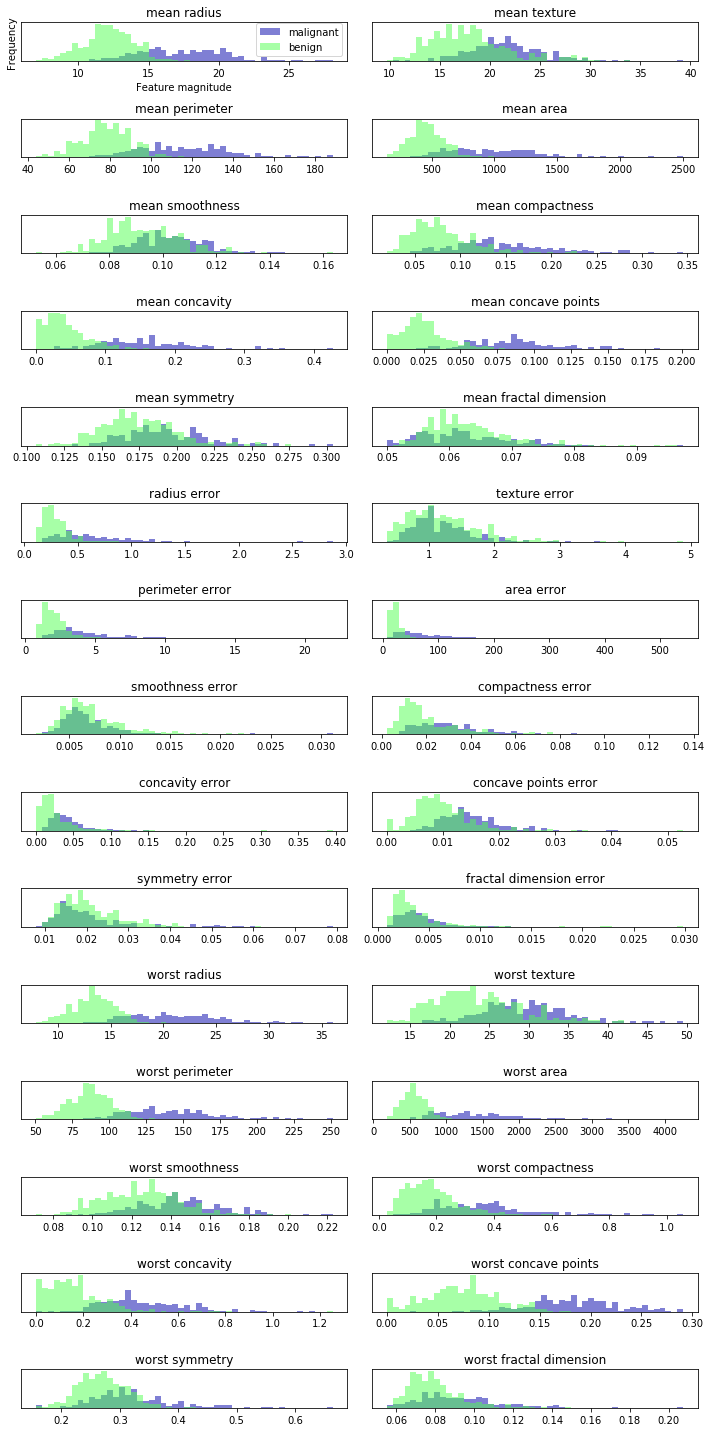

In [11]:
import numpy as np

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
print("malignant.shape", malignant.shape)
print("benign.shape", benign.shape)

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
#     print("bins", bins)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer . feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc = "best")
fig.tight_layout()

## Dimensionality Reduction

We can find the first two principal components, and visualizethe data in this new two-dimensional space with a single scatter plot. Before we apply PCA, we scale our data so that each feature has unitvariance using StandardScaler :

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

We instantiate the PCA object, find theprincipal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform. Bydefault, PCA only rotates (and shifts) the data, but keeps allprincipal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object

Original shape: (569, 30)
Reduced shape: (569, 2)


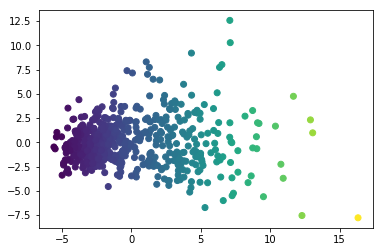

In [13]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components = 2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape))) 

plt.scatter(X_pca[:,0], X_pca[:,1], c=X_pca[:,0])

Text(0, 0.5, 'Second principal component')

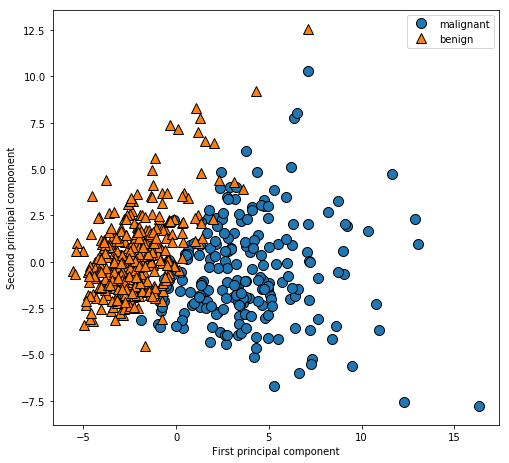

In [14]:
# plot first vs. second principal component, colored by class
plt.figure(figsize = (8 , 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component") 

Each row in components_ corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.).The columns correspond to the original features attribute of the PCA in this example, “meanradius,” “mean texture,” and so on. Let’s have a look at the content of components_

In [15]:
print ( "PCA component shape: {}".format(pca.components_.shape)) 
print ( "PCA components: \n {}".format(pca.components_)) 

PCA component shape: (2, 30)
PCA components: 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map, which might be easier to understand:

Text(0, 0.5, 'Principal components')

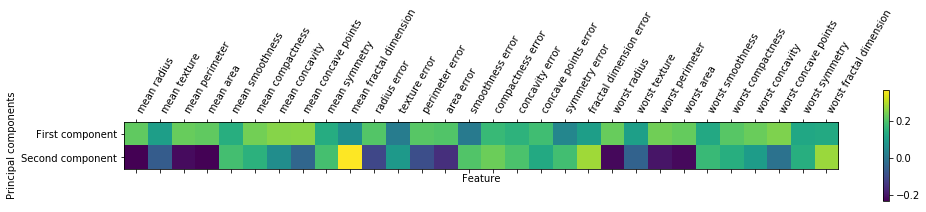

In [16]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Eigenfaces for feature extraction

image_shape (87, 65)


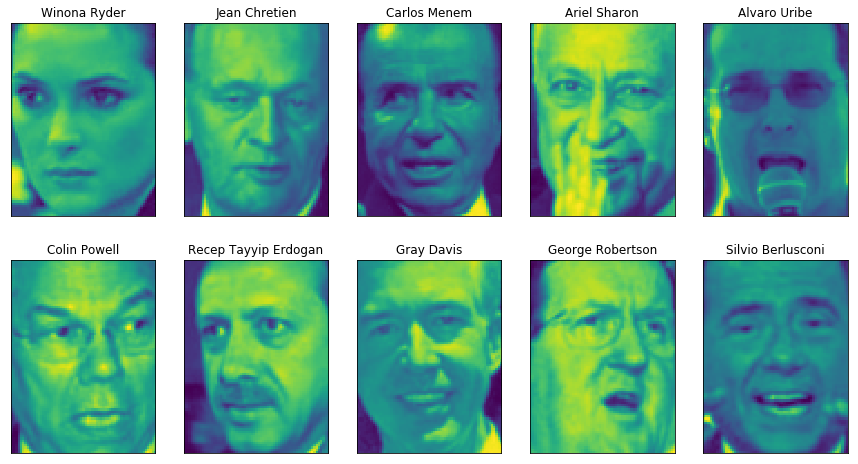

In [17]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
print("image_shape", image_shape)

# subplot_kwを設定して目盛りを非表示にする
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people

In [18]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names))) 

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [19]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = ' ')
    if(i + 1) % 3 == 0:
        print() # 空行 

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W.Bush)

In [20]:
mask = np.zeros(people.target.shape, dtype = np.bool) # 配列の初期化。すべてfalseの配列
print("mask:", mask)
print("mask.shape", mask.shape)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = True
    X_people = people.data[mask]
    y_people = people.target[mask]
    # scale the grayscale values to be between 0 and 1
    # instead of 0 and 255 for better numeric stability
    X_people = X_people / 255. 
# print("mask:", mask[0:100])
print("people.data.shape", people.data.shape)
print("X_people.shape", X_people.shape)

counts = np.bincount(y_people)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = ' ')
    if(i + 1) % 3 == 0:
        print() # 空行 

mask: [False False False ... False False False]
mask.shape (3023,)
people.data.shape (3023, 5655)
X_people.shape (2063, 5655)
Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               50 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell               50 David Beckham              31 
Donald Rumsfeld            50 George Robertson           22 George W Bush              50 
Gerhard Schroeder          50 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                50 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             50 Jean Chretien              50 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez           

A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying. This classifier could in principle work with only a single training example per class. Let’s take a look at how well KNeighborsClassifier does here.

We only correctly identify aperson every fourth time. This is where PCA comes in.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test))) 

Test set score of 1-nn: 0.23


When usinga pixel representation to compare two images, we compare the grayscalevalue of each individual pixel to the value of the pixel in thecorresponding position in the other image. This representation is quitedifferent from how humans would interpret the image of a face, and it ishard to capture the facial features using this raw representation.

Here, we enable the whitening option of PCA,which rescales the principal components to have the same scale. This isthe same as using StandardScaler after the transformation. Reusing thedata from Figure 3-3 again, whitening corresponds to notonly rotating the data, but also rescaling it so that the center panelis a circle instead of an ellipse (see Figure 3-8 ):

In [22]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape:", X_train_pca.shape) 

X_train_pca.shape: (1547, 100)


Our accuracy improved quite significantly, from 26.6% to 35.7%,confirming our intuition that the principal components might provide abetter representation of the data.

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


(87, 65)


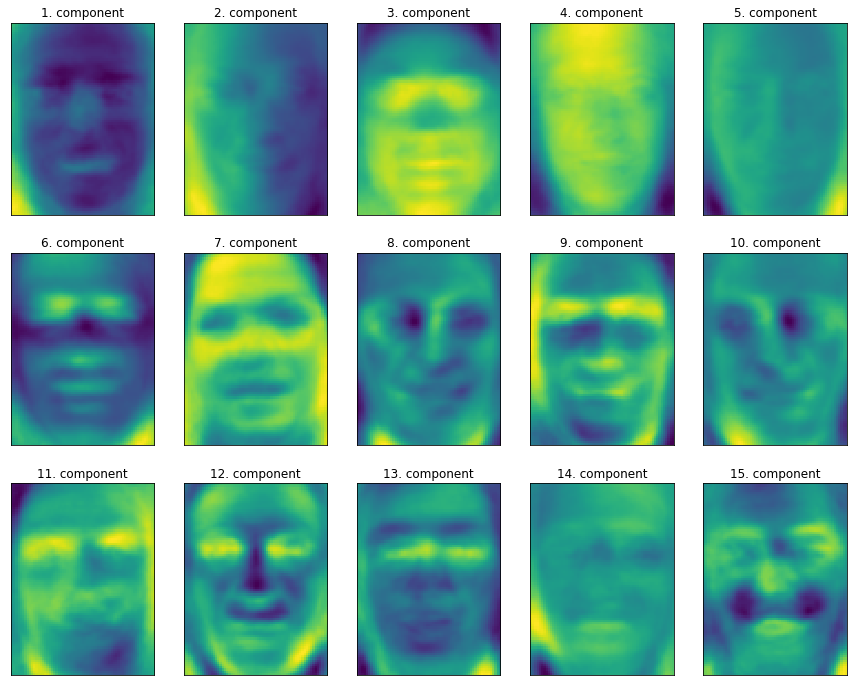

In [24]:
print(image_shape)
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title("{}. component".format((i +1)))

We can also try to use PCA to visualize all the faces in the dataset ina scatter plot using the first two principal components ( Figure 3-12 ), with classesgiven by who is shown in the image, similarly to what we did for thecancer dataset:

As you can see, when we use only the first two principal components thewhole data is just a big blob, with no separation of classes visible.This is not very surprising, given that even with 10 components, asshown earlier in Figure 3-11 , PCA only captures veryrough characteristics of the faces

Text(0, 0.5, 'Second principal component')

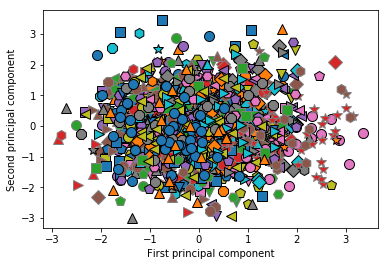

In [25]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 3.4.2 Non-Negative Matrix Factorization (NMF)

As a first look into the data, let’s try extracting only a fewcomponents (say, 15).

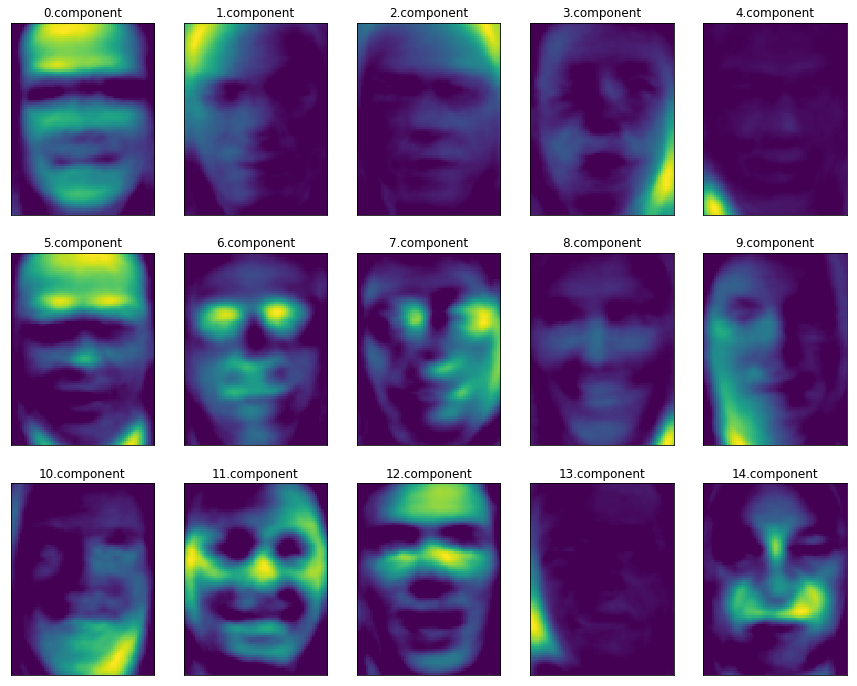

In [26]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

As expected, faces that have a high coefficient for component 3 arefaces looking to the right ( Figure 3-16 ), while faces with a high coefficient for component 7 are looking to the left ( Figure 3-17 ).

X_train_nmf.shape (1547, 15)
X_train_nmf[:, compn].shape (1547,)
np.argsort(X_train_nmf[:, compn]).shape (1547,)
inds.shape (1547,)


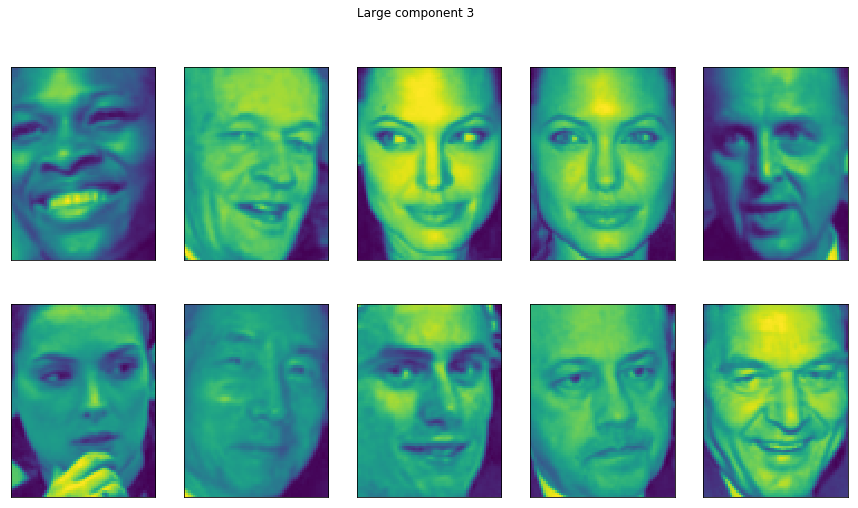

In [27]:
compn = 3
# sort by 3rd component, plot first 10 images
print("X_train_nmf.shape", X_train_nmf.shape)
print("X_train_nmf[:, compn].shape", X_train_nmf[:, compn].shape)

# コンポーネント3の数値が高いindexを取得
inds = np.argsort(X_train_nmf[:, compn])[::1]
print("np.argsort(X_train_nmf[:, compn]).shape", np.argsort(X_train_nmf[:, compn]).shape)
print("inds.shape", inds.shape)

fig , axes = plt.subplots(2, 5, figsize = ( 15 , 8 ), subplot_kw = {'xticks' : (), 'yticks' : ()})
fig.suptitle("Large component 3")
for i, (ind , ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

# compn = 7
# # sort by 7th component, plot first 10 images
# inds = np.argsort(X_train_nmf[:, compn])[:: 1]
# fig.suptitle("Large component 7")
# fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = { 'xticks' : (), 'yticks' : ()})

# for i , (ind, ax) in enumerate(zip(inds, axes.ravel())):
#     ax.imshow(X_train[ind].reshape(image_shape)) 

Let’s say we are interested in a signal that is a combination of threedifferent sources.
Unfortunately we cannot observe the original signals, but only anadditive mixture of all three of them. We want to recover thedecomposition of the mixed signal into the original components. Weassume that we have many different ways to observe the mixture (say 100measurement devices), each of which provides us with a series ofmeasurements:

S.shape (2000, 3)


Text(0, 0.5, 'Signal')

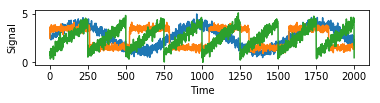

In [28]:
S = mglearn.datasets.make_signals()
print("S.shape", S.shape)
plt.figure(figsize = (6, 1)) 
plt.plot(S, '-' )
plt.xlabel("Time")
plt.ylabel("Signal")

In [29]:
A = np.random.RandomState(0).uniform(size = (100, 3))
print("A.shape", A.shape)
print("A[:10]", A[:10])
print("A.T.shape", A.T.shape)
print("S.shape", S.shape)
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape)) 

A.shape (100, 3)
A[:10] [[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]]
A.T.shape (3, 100)
S.shape (2000, 3)
Shape of measurements: (2000, 100)


We can use NMF to recover the three signals

In [30]:
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape)) 
print(S[0])
print(S_[0])

Recovered signal shape: (2000, 3)
[2.65408203 2.48908887 1.07757433]
[0.63278972 0.49293465 0.1069614 ]


For comparison, we also apply PCA: 

In [31]:
pca = PCA(n_components = 3)
H = pca.fit_transform(X) 
print("H.shape", H.shape)

H.shape (2000, 3)


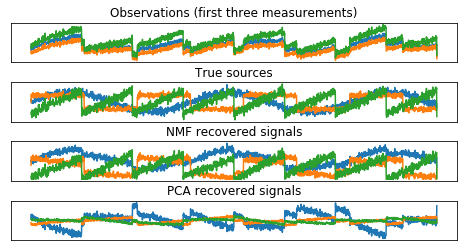

In [32]:
# SからXを生成（ノイズを加えている）
# XからS_を生成(ノイズを除去)
models = [X, S, S_ , H]
names = ['Observations (first three measurements)', 'True sources', 'NMF recovered signals', 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize = (8, 4), gridspec_kw = {'hspace': .5}, subplot_kw = {'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model [:, :3], '-') 

## Manifold Learning with t-SNE

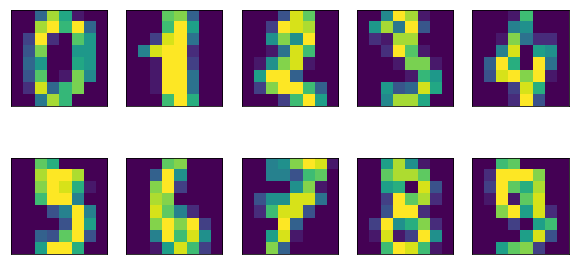

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = { 'xticks' :(), 'yticks' : ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Here, we actually used the true digit classes as glyphs, to show which class is where. The digits zero, six, and four are relatively well separated using the first two principal components, though theystill overlap. Most of the other digits overlap significantly.

digits_pca.shape (1797, 2)


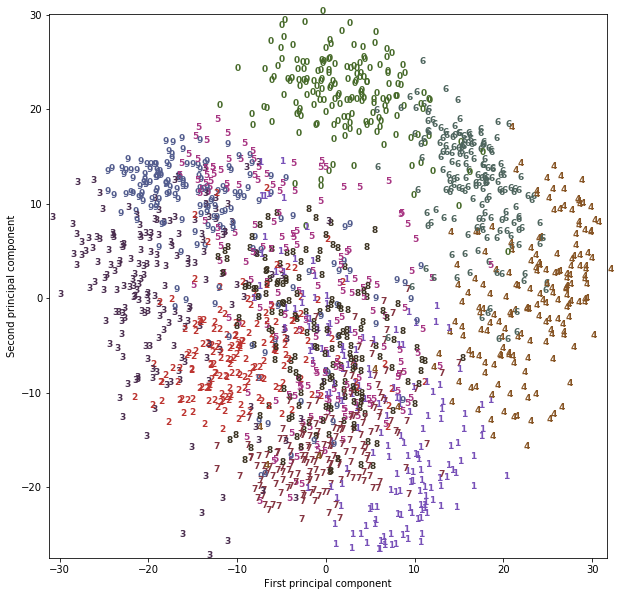

In [34]:
# build a PCA model
pca = PCA(n_components = 2)
pca.fit(digits . data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
print("digits_pca.shape", digits_pca.shape)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize = (10 , 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max()) 

for i in range (len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i , 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict = {'weight' : 'bold' , 'size' : 9})
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component") 

Let’s apply t-SNE to the same dataset, and compare the results. As t-SNE does not support transforming new data, the TSNE class has no transform method. Instead, we can call the fit_transform method, which will build the model and immediately return the transformed data.

it is completely unsupervised. Still,it can find a representation of the data in two dimensions that clearlyseparates the classes, based solely on how close points are in theoriginal space.

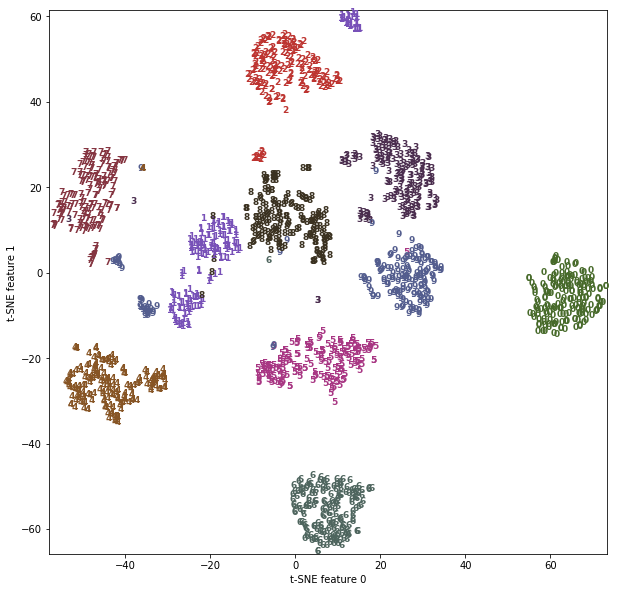

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict = {'weight' : 'bold' , 'size' : 9})
    plt.xlabel("t-SNE feature 0")
    plt.ylabel("t-SNE feature 1") 


## k-Means Clustering

The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.

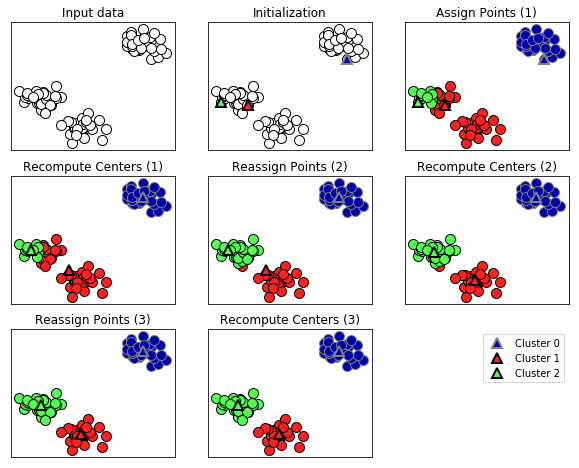

In [36]:
mglearn.plots.plot_kmeans_algorithm()

Applying k means with scikit-learn is quite straightforward. Here, weapply it to the synthetic data that we used for the preceding plots. Weinstantiate the KMeans class, and set the number of clusters we arelooking for. 3 Then we call the fit method with the data:

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)
print("X.shape", X.shape)
print("y.shape", y.shape)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X) 

X.shape (100, 2)
y.shape (100,)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in X is assigned acluster label. You can find these labels in the kmeans.labels_ attribute:

In [38]:
print("Cluster memberships: \n {}".format(kmeans.labels_)) 

Cluster memberships: 
 [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Each new point is assigned to the closest cluster center whenpredicting, but the existing model is not changed. Running predict onthe training set returns the same result as labels_ :

In [39]:
print(kmeans.predict(X))
print("kmeans.predict(X).min(axis=0)", kmeans.predict(X).min(axis=0))
print("kmeans.predict(X).max(axis=0)", kmeans.predict(X).max(axis=0))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]
kmeans.predict(X).min(axis=0) 0
kmeans.predict(X).max(axis=0) 2


The cluster centers are stored in the cluster_centers_ attribute, and we plot them as triangles

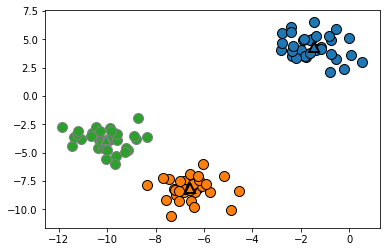

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers = '^', markeredgewidth = 2)

We can also use more or fewer cluster centers 

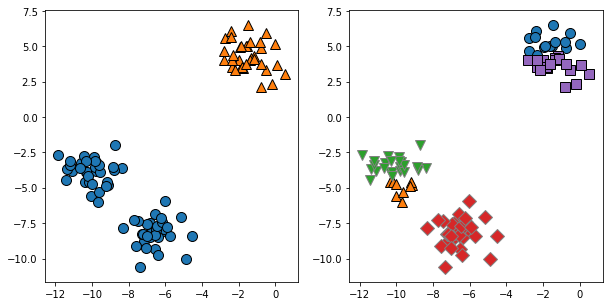

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
assignments = kmeans.labels_ 
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0])
# using five cluster centers:

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments , ax = axes[1]) 

Text(0, 0.5, 'Feature 1')

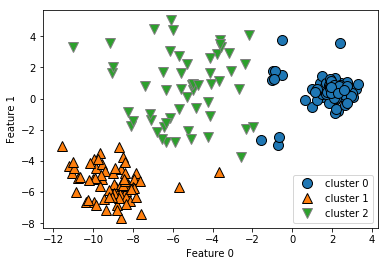

In [42]:
X_varied, y_varied = make_blobs(n_samples = 200, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
kmeans =  KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_varied)
# y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)
y_pred = kmeans.predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc = 'best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 

k means also assumes that all directions are equally important for each cluster. The following plot shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k means only considers the distance
to the nearest cluster center, it can’t handle this kind of data

Text(0, 0.5, 'Feature 1')

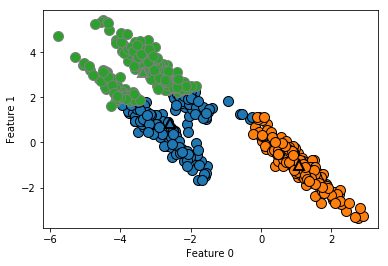

In [43]:
# generate some random cluster data
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers = '^', markeredgewidth = 2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k means also performs poorly if the clusters have more complex shapes, like the two_moons data

y_pred.shape (200,)
y_pred[:10] [0 0 1 1 0 0 0 0 0 0]
kmeans.cluster_centers_.shape (2, 2)


Text(0, 0.5, 'Feature 1')

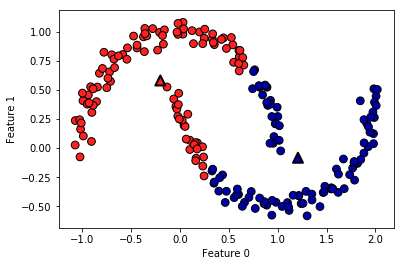

In [44]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print("y_pred.shape", y_pred.shape)
print("y_pred[:10]", y_pred[:10])
print("kmeans.cluster_centers_.shape", kmeans.cluster_centers_.shape)

# plot the cluster assignments and cluster centers
plt.scatter(X [:, 0], X [:, 1], c = y_pred , cmap = mglearn.cm2, s = 60 , edgecolor = 'k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '^' , c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100, linewidth = 2, edgecolor = 'k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

pca = PCA(n_components = 100, random_state = 0)
pca.fit(X_train)
print("pca.components_.shape", pca.components_.shape)

nmf = NMF(n_components = 100, random_state = 0)
nmf.fit(X_train)
print("nmf.components_.shape", nmf.components_.shape)
print("nmf.components_[:3]", nmf.components_[:3])
print("nmf.transform(X_test).shape", nmf.transform(X_test).shape)
print("np.dot(nmf.transform(X_test), nmf.components_) .shape", np.dot(nmf.transform(X_test), nmf.components_) .shape)

kmeans = KMeans(n_clusters = 100, random_state = 0)
kmeans.fit(X_train)
print("kmeans.cluster_centers_.shape", kmeans.cluster_centers_.shape)
print("kmeans.cluster_centers_[:3]", kmeans.cluster_centers_[:3])
print("kmeans.predict(X_test).shape", kmeans.predict(X_test).shape)
print("kmeans.predict(X_test)[:3]", kmeans.predict(X_test)[:3])

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_) 
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

X_train.shape (1547, 5655)
y_train.shape (1547,)
X_test.shape (516, 5655)
y_test.shape (516,)
pca.components_.shape (100, 5655)
nmf.components_.shape (100, 5655)
nmf.components_[:3] [[0.         0.         0.         ... 0.         0.0036319  0.        ]
 [0.0467034  0.04725104 0.05184523 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
nmf.transform(X_test).shape (516, 100)
np.dot(nmf.transform(X_test), nmf.components_) .shape (516, 5655)
kmeans.cluster_centers_.shape (100, 5655)
kmeans.cluster_centers_[:3] [[0.16862746 0.151634   0.12810458 ... 0.08758169 0.08104575 0.07189542]
 [0.38847297 0.39489007 0.40023765 ... 0.44515747 0.3979798  0.35995245]
 [0.8003565  0.7857398  0.7404635  ... 0.5153892  0.5214498  0.5202614 ]]
kmeans.predict(X_test).shape (516,)
kmeans.predict(X_test)[:3] [62 56 42]


axes.T.shape (5, 3)
kmeans.cluster_centers_.shape (100, 5655)


Text(0, 0.5, 'pca')

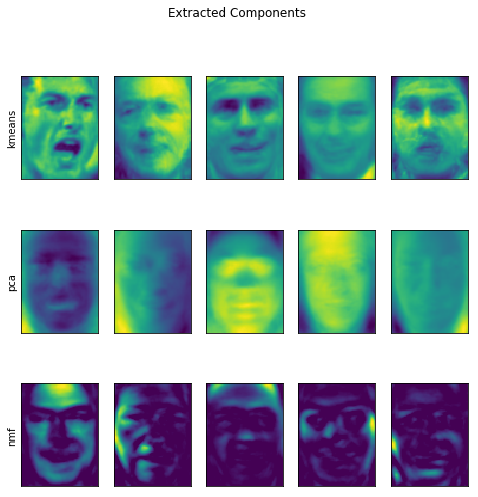

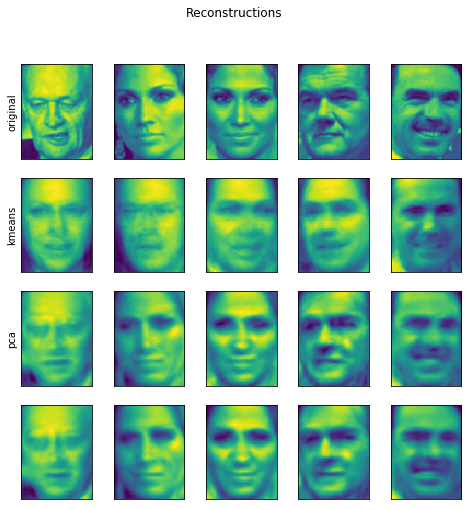

In [46]:
fig, axes = plt.subplots(3, 5, figsize = (8, 8), subplot_kw = { 'xticks' : (), 'yticks' : ()})
fig.suptitle("Extracted Components")
print("axes.T.shape", axes.T.shape)
print("kmeans.cluster_centers_.shape", kmeans.cluster_centers_.shape)
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")


fig, axes = plt.subplots(4, 5, subplot_kw = { 'xticks' : (), 'yticks' : ()}, figsize = (8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca . reshape(image_shape))
    ax[3].imshow(rec_nmf . reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2 , 0].set_ylabel("pca")

Let’s go back to the two_moons data. Using PCA or NMF, there is nothing much we can do to this data, as it lives in only two dimensions.
Reducing it to one dimension with PCA or NMF would completely destroy the structure of the data. But we can find a more expressive
representation with k means, by using more cluster centers (see Figure 3-32 )

Cluster memberships: 
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


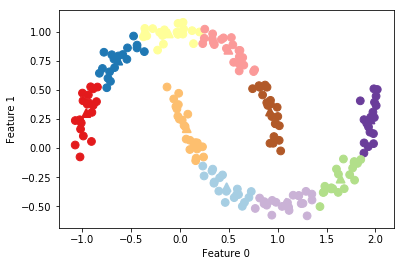

In [47]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 60, cmap = 'Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 60, marker = '^', c = range(kmeans.n_clusters), linewidth = 2, cmap = 'Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships: \n {}".format(y_pred))

We can see this as the data being represented using 10 components (that is, we have 10 new features), with all features being 0, apart from the one that represents the cluster center the point is assigned to. Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features. This can be accomplished using the transform method of kmeans

In [48]:
print("X.shape", X.shape)
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features: \n {}".format(distance_features)) 

X.shape (200, 2)
Distance feature shape: (200, 10)
Distance features: 
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## Agglomerative Clustering
the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. 

Text(0, 0.5, 'Feature 1')

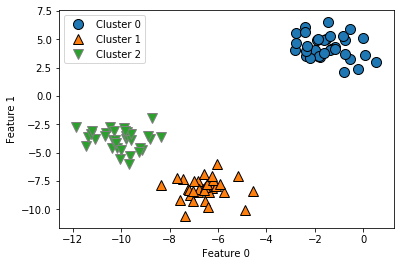

In [49]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend([ "Cluster 0" , "Cluster 1" , "Cluster 2"], loc = "best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Hierarchical clustering and dendrograms

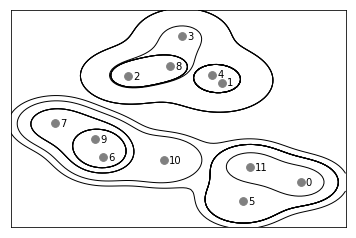

In [50]:
mglearn.plots.plot_agglomerative()

While this visualization provides a very detailed view of the hierarchical clustering, it relies on the two-dimensional nature of the
data and therefore cannot be used on datasets that have more than two features. There is, however, another tool to visualize hierarchical
clustering, called a dendrogram , that can handle multidimensional datasets.

The y-axis in the dendrogram doesn’t just specify when in theagglomerative algorithm two clusters get merged. The length of eachbranch also shows how far apart the merged clusters are. The longestbranches in this dendrogram are the three lines that are marked by thedashed line labeled “three clusters.”

Text(0, 0.5, 'Cluster distance')

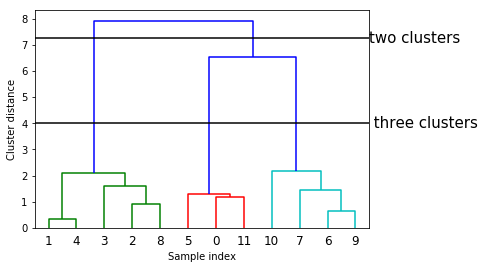

In [51]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram , ward

X , y = make_blobs(random_state = 0 , n_samples = 12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

# line
ax.plot(bounds, [7.25, 7.25], '-', c = 'k')
ax.plot(bounds, [4 , 4 ], '-', c = 'k')

# text
ax.text(bounds[1], 7.25, 'two clusters', va = 'center', fontdict = {'size' : 15})
ax.text(bounds[1], 4, ' three clusters', va = 'center', fontdict = {'size' : 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## DBSCAN

The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori , it can capture clusters of complex
shapes, and it can identify points that are not part of any cluster.

As you can see, all data points were assigned the label 1 , which stands for noise. This is a consequence of the default parameter settings for eps and min_samples , which are not tuned for small toy datasets. 

As you can see, all data points were assigned the label 1 , which stands for noise. This is a consequence of the default parameter settings for eps and min_samples , which are not tuned for small toy datasets.

In [52]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state = 0, n_samples = 12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships: \n {}".format(clusters)) 

Cluster memberships: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


### シンプルなデータでテスト

The algorithm works by picking an arbitrary point to start with. It then finds allpoints with distance eps or less from that point. If there are less than min_samples points within distance eps of the starting point, this point is labeled as noise ,meaning that it doesn’t belong to any cluster. If there are morethan min_samples points within a distance of eps , the point islabeled a core sample and assigned a new cluster label. Then, allneighbors (within eps ) of the point are visited. If they have notbeen assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited inturn, and so on. The cluster grows until there are no more core sampleswithin distance eps of the cluster. Then another point that hasn’tyet been visited is picked, and the same procedure is repeated. In the end, there are three kinds of points: core points, points thatare within distance eps of core points (called boundary points ), andnoise.

clusters.shape (11,)
clusters [ 0  0  0  0  0  0  1  1 -1  0  1]
core_sample [[0.  1. ]
 [0.  1.1]
 [0.  1.2]
 [0.  1.3]
 [0.  2. ]
 [0.  4. ]]
unique_clustters [-1  0  1]


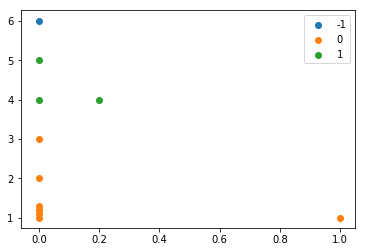

In [53]:
from sklearn.cluster import DBSCAN

X = np.array([
    [0,1],[0,1.1],[0,1.2],[0,1.3],
    [1,1],[0,2],[0,4],[0,5],[0,6],[0,3],[0.2,4]
])
# X = np.array([[0,1],[1,1],[0,2],[0,4],[0,5],[0,6],[0,3]])

dbscan = DBSCAN(min_samples=4, eps=1)
clusters = dbscan.fit_predict(X)
print("clusters.shape", clusters.shape)
print("clusters", clusters)
print("core_sample", X[dbscan.core_sample_indices_])

unique_clustters = np.unique(clusters)
print("unique_clustters", unique_clustters)

for cc in unique_clustters:
    mask = clusters == cc
    plt.scatter(X[:,0][mask], X[:,1][mask], label=cc)

plt.legend()

Increasing eps (going from left to right in the figure) means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing min_samples (going from top to bottom in the figure) means that fewer points will be
core points, and more points will be labeled as noise.

The min_samples setting mostly determines whether points in less dense regions will be labeled as outliers or as their own clusters. If you
increase min_samples , anything that would have been a cluster with less than min_samples many samples will now be labeled as noise. min_samples therefore determines the minimum cluster size. 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


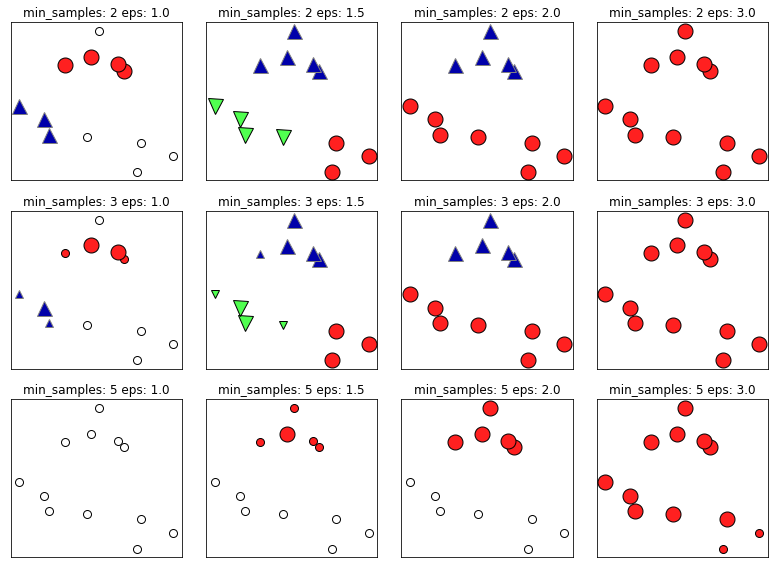

In [54]:
mglearn.plots.plot_dbscan()

As the algorithm produced the desired number of clusters (two), theparameter settings seem to work well. If we decrease eps to 0.2 (fromthe default of 0.5 ), we will get eight clusters, which is clearly too many.Increasing eps to 0.7 results in a single cluster.

Text(0, 0.5, 'Feature 1')

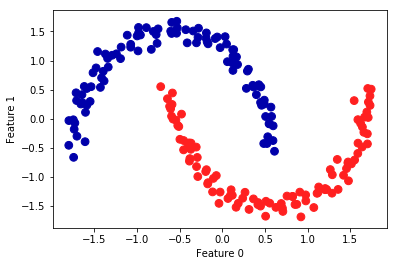

In [55]:
X , y = make_moons(n_samples = 200 , noise = 0.05 , random_state = 0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = mglearn.cm2, s = 60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 

## Comparing and Evaluating Clustering Algorithms

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the adjusted rand index (ARI) and normalized mutual information (NMI), which both provide a quantitative measure with an optimum of 1 and a value of 0 for unrelated clusterings (though the ARI can become negative). 

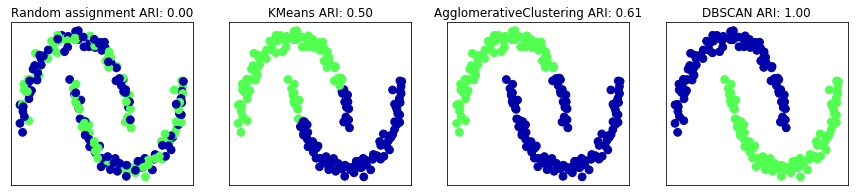

In [56]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw = {'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c = random_clusters, cmap = mglearn.cm3, s = 60)
# axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c = y, cmap = mglearn.cm3, s = 60)
axes[0].set_title("Random assignment ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = mglearn.cm3, s = 60)
    ax.set_title("{} ARI: {:.2f}".format(algorithm.__class__.__name__ , adjusted_rand_score(y, clusters))) 

The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth. However, the cluster labels
themselves are meaningless the only thing that matters is which points are in the same cluster:

In [57]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


## Evaluating clustering without ground truth

As you can see, k means gets the highest silhouette score, even though we might prefer the result produced by DBSCAN. 

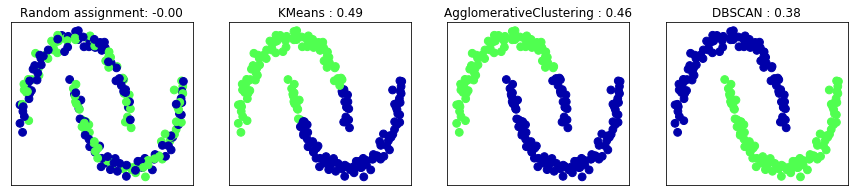

In [58]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw = {'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c = random_clusters, cmap = mglearn.cm3, s = 60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = mglearn.cm3, s = 60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled , clusters))) 


## Comparing algorithms on the faces dataset

In [59]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA

pca =PCA(n_components = 100, whiten = True, random_state = 0)
X_pca = pca.fit_transform(X_people)

We see that all the returned labels are –1, so all of the data was labeled as “noise” by DBSCAN. There are two things we can change to help this.
we can make eps higher, to expand the neighborhood of each point, andset min_samples lower, to consider smaller groups of points asclusters. Let’s try changing min_samples first:

In [60]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels))) 

Unique labels: [-1]


Even when considering groups of three points, everything is labeled as noise. So, we need to increase eps

In [61]:
dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [62]:
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels))) 

Unique labels: [-1  0]


There are very few noise points only 27 so we can look at all of them

In [63]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("labels.shape", labels.shape)
print("labels[:5]", labels[:5])
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

labels.shape (2063,)
labels[:5] [0 0 0 0 0]
Number of points per cluster: [  32 2031]


Comparing these images to the random sample of face images fromFigure 3-7 , we can guess why they were labeled as noise: thefifth image in the first row shows a person drinking from a glass,there are images of people wearing hats, and in the last image there’s a hand in front ofthe person’s face. The other images contain odd angles or crops that are tooclose or too wide. This kind of analysis trying to find “the odd one out” is calledoutlier detection

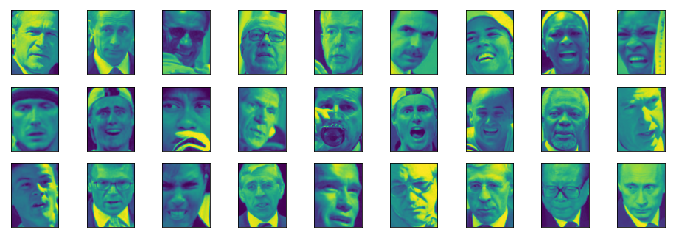

In [64]:
noise = X_people[labels == -1]
fig, axes = plt.subplots(3, 9, subplot_kw = { 'xticks':(), 'yticks':()}, figsize = (12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)

If we want to find more interesting clusters than just one large one, weneed to set eps smaller, somewhere between 15 and 0.5 (the default).Let’s have a look at what different values of eps result in.

What is interesting to note is that there is never more than one largecluster. At most, there is one large cluster containing most of thepoints, and some smaller clusters. This indicates that there are not twoor three different kinds of face images in the data that are verydistinct, but rather that all images are more or less equally similar to (ordissimilar from) the rest.

In [65]:
for eps in [1 ,3, 5, 7, 9, 11, 13]:
    print(" \n eps={}".format(eps))
    dbscan = DBSCAN(eps = eps, min_samples = 3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1))) 

 
 eps=1
Number of clusters: 1
Cluster sizes: [2063]
 
 eps=3
Number of clusters: 1
Cluster sizes: [2063]
 
 eps=5
Number of clusters: 1
Cluster sizes: [2063]
 
 eps=7
Number of clusters: 14
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]
 
 eps=9
Number of clusters: 4
Cluster sizes: [1307  750    3    3]
 
 eps=11
Number of clusters: 2
Cluster sizes: [ 413 1650]
 
 eps=13
Number of clusters: 2
Cluster sizes: [ 120 1943]


The results for eps=7 look most interesting, with many small clusters.We can investigate this clustering in more detail by visualizing all of thepoints in each of the 13 small clusters.

Some of the clusters correspond to people with very distinct faces(within this dataset), such as Sharon or Koizumi. Within each cluster,the orientation of the face is also quite fixed, as well as the facialexpression. Some of the clusters contain faces of multiple people, butthey share a similar orientation and expression.

X_people.shape (2063, 5655)
X_pca.shape (2063, 100)
y_people (2063,)
y_people[:5] [61 25  9  5  1]
labels.shape (2063,)


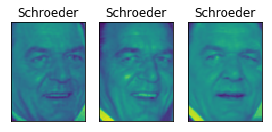

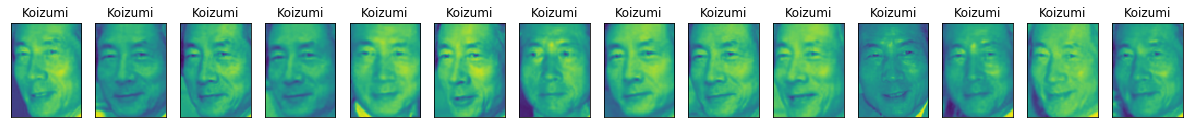

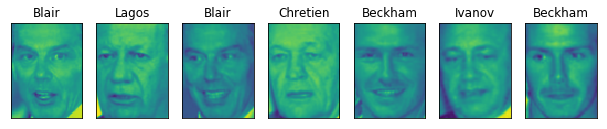

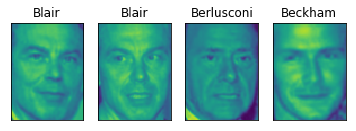

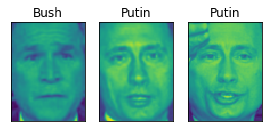

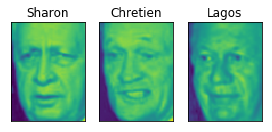

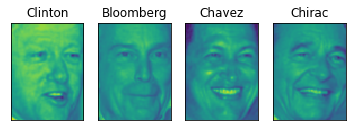

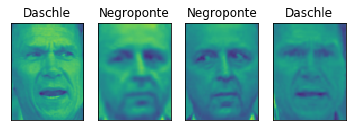

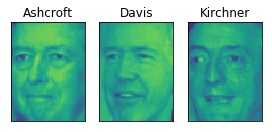

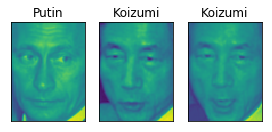

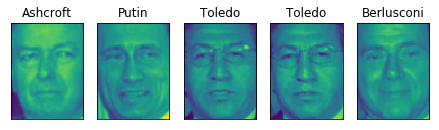

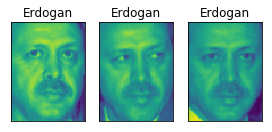

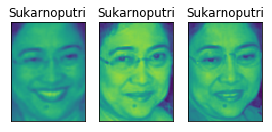

In [66]:
print("X_people.shape", X_people.shape)
print("X_pca.shape", X_pca.shape)
print("y_people", y_people.shape)
print("y_people[:5]", y_people[:5])

dbscan = DBSCAN(min_samples = 3, eps = 7)
labels = dbscan.fit_predict(X_pca)
print("labels.shape", labels.shape)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig , axes = plt.subplots(1, n_images, figsize = (n_images * 1.5 , 4), subplot_kw = { 'xticks' : (), 'yticks' : ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])

As you can see, k-means clustering partitioned the data into relativelysimilarly sized clusters from 64 to 386. This is quite different fromthe result of DBSCAN

In [67]:
# extract clusters with k-means
km = KMeans(n_clusters = 10, random_state = 0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


We can further analyze the outcome of k means by visualizing the clustercenters ( Figure 3-43 ). As we clustered in the representation produced by PCA , we needto rotate the cluster centers back into the original space to visualizethem, using pca.inverse_transform :

km.cluster_centers_.shape (10, 100)


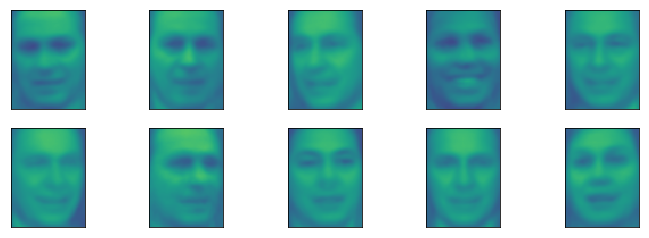

In [68]:
print("km.cluster_centers_.shape", km.cluster_centers_.shape)
fig, axes = plt.subplots(2, 5, subplot_kw = { 'xticks' : (), 'yticks' : ()}, figsize = (12, 4))
for center, ax in zip (km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin = 0, vmax = 1) 

The “atypical” points are not very similar to thecluster centers, though, and their assignment seems somewhat arbitrary.This can be attributed to the fact that k means partitions all the datapoints and doesn’t have a concept of “noise” points, as DBSCAN does.

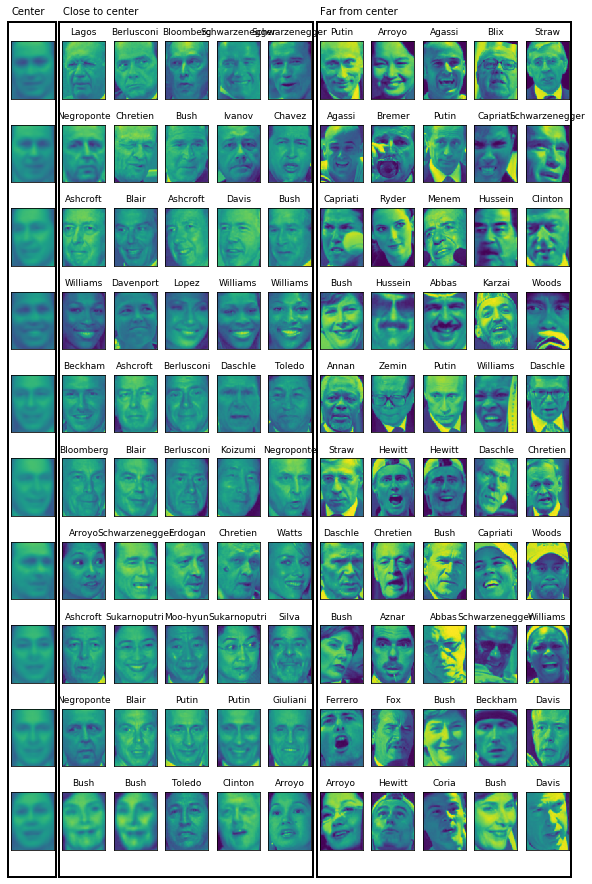

In [69]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

Now, let’s look at the results of agglomerative clustering:

In [70]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters = 10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg))) 

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


We can compute the ARI to measure whether the two partitions of the data given by agglomerative clustering and k means are similar
An ARI of only 0.13 means that the two clusterings labels_agg and labels_km have little in common. This is not very surprising, given
the fact that points further away from the cluster centers seem to have little in common for k means.

In [72]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg , labels_km))) 

ARI: 0.09


Next, we might want to plot the dendrogram

Text(0, 0.5, 'Cluster distance')

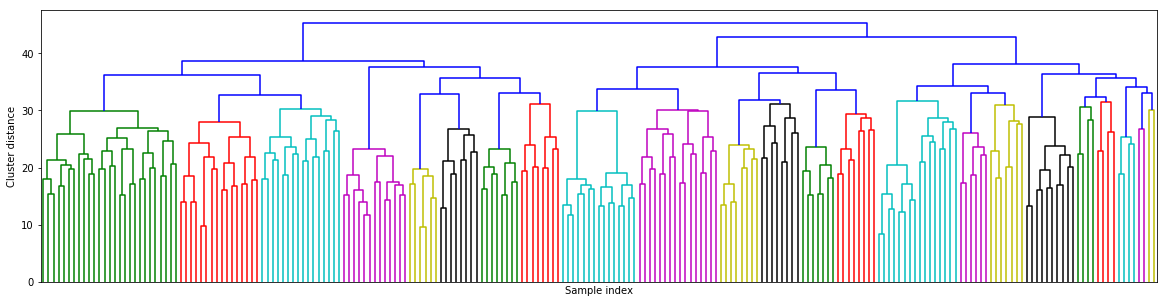

In [71]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize = (20, 5))
dendrogram(linkage_array, p = 7, truncate_mode = 'level', no_labels = True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance") 

Let’s visualize the 10 clusters, as we did for k means earlier ( Figure 3-46 ). Note that there is no notion of cluster center in agglomerative clustering (though we could compute the mean), and we simply show the first couple of points in each cluster. We show the number of points in each cluster to the left of the first image:

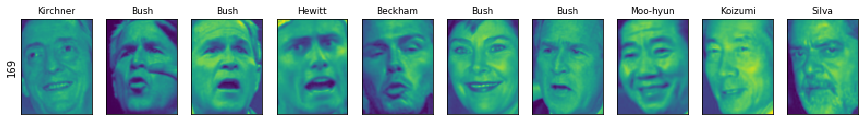

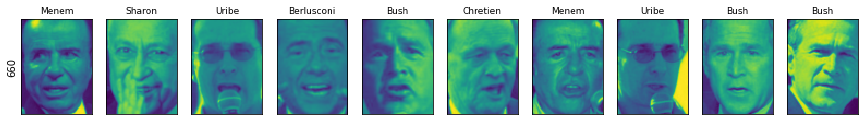

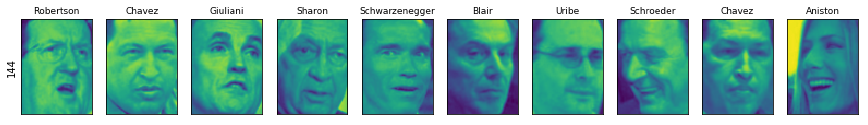

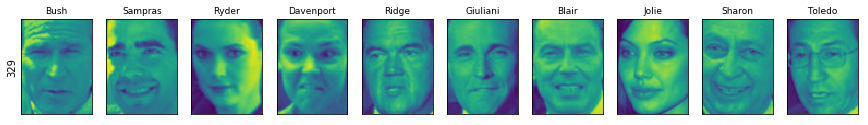

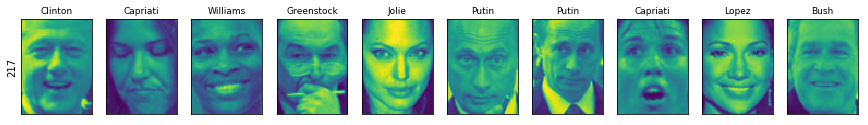

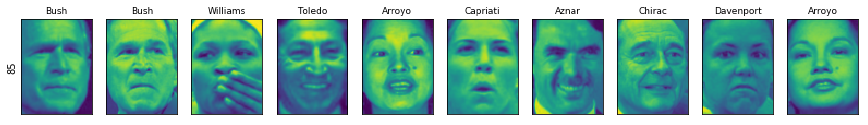

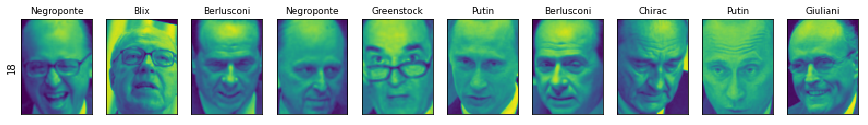

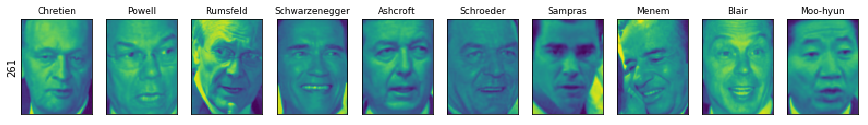

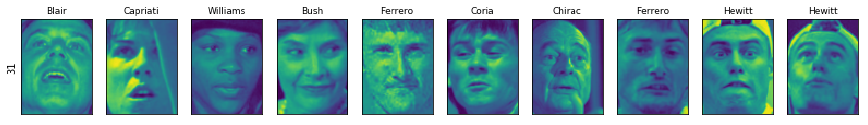

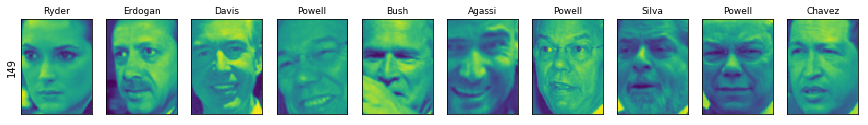

In [73]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw = {'xticks' : (), 'yticks' : ()}, figsize = (15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1], fontdict = {'fontsize' : 9})

While some of the clusters seem to have a semantic theme, many of themare too large to be actually homogeneous. To get more homogeneousclusters, we can run the algorithm again, this time with 40 clusters, andpick out some of the clusters that are particularly interesting.

Here, the clustering seems to have picked up on “dark skinned and smiling,” “collared shirt,” “smiling woman,” “Hussein,” and “high
forehead.” We could also find these highly similar clusters using the dendrogram, if we did more a detailed analysis.

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


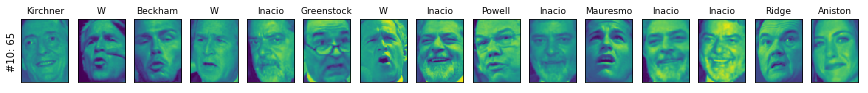

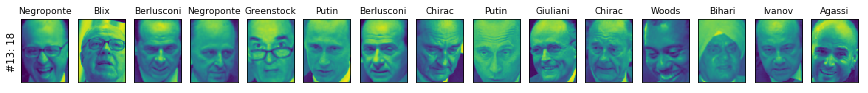

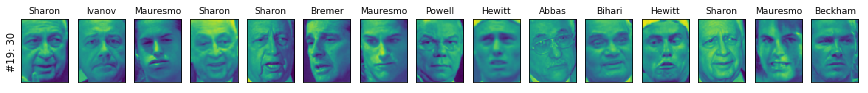

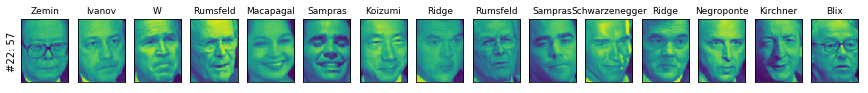

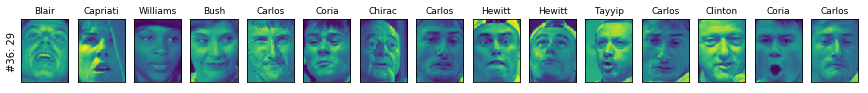

In [76]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters = 40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw = {'xticks' : (), 'yticks' : ()}, figsize = (15 , 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[1], fontdict = { 'fontsize' : 9})
        for i in range(cluster_size, 15):
            axes[i].set_visible(False) 